#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [29]:
model = Sequential()

In [30]:
#卷積層1

In [31]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [32]:
model.add(Dropout(rate=0.25))

In [33]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [34]:
#卷積層2與池化層2

In [35]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [36]:
model.add(Dropout(0.25))

In [37]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [38]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [39]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [40]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [41]:
model.add(Dense(10, activation='softmax'))

In [43]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [24]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [25]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Epoch 1/12
293/293 [==============================] - 89s 301ms/step - loss: 0.0907 - accuracy: 0.1044 - val_loss: 0.0899 - val_accuracy: 0.1226
Epoch 2/12
293/293 [==============================] - 81s 274ms/step - loss: 0.0902 - accuracy: 0.1097 - val_loss: 0.0897 - val_accuracy: 0.1427
Epoch 3/12
293/293 [==============================] - 87s 297ms/step - loss: 0.0899 - accuracy: 0.1188 - val_loss: 0.0896 - val_accuracy: 0.1569
Epoch 4/12
293/293 [==============================] - 86s 294ms/step - loss: 0.0896 - accuracy: 0.1304 - val_loss: 0.0895 - val_accuracy: 0.1638
Epoch 5/12
293/293 [==============================] - 81s 275ms/step - loss: 0.0895 - accuracy: 0.1359 - val_loss: 0.0893 - val_accuracy: 0.1742
Epoch 6/12
293/293 [==============================] - 85s 290ms/step - loss: 0.0893 - accuracy: 0.1407 - val_loss: 0.0892 - val_accuracy: 0.1826
Epoch 7/12
293/293 [==============================] - 93s 317ms/step - loss: 0.0891 - accuracy: 0.1534 - val_loss: 0.0891 - val_ac

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

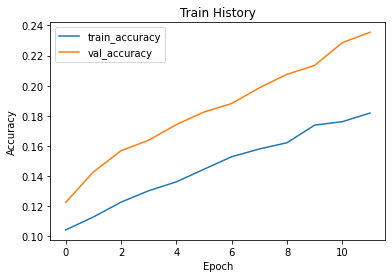

In [27]:
show_train_history('accuracy','val_accuracy')

In [45]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Epoch 1/12
293/293 [==============================] - 97s 328ms/step - loss: 0.4252 - accuracy: 0.1047 - val_loss: 0.3657 - val_accuracy: 0.1669
Epoch 2/12
293/293 [==============================] - 70s 238ms/step - loss: 0.3328 - accuracy: 0.1248 - val_loss: 0.3625 - val_accuracy: 0.1917
Epoch 3/12
293/293 [==============================] - 83s 285ms/step - loss: 0.3289 - accuracy: 0.1464 - val_loss: 0.3612 - val_accuracy: 0.2334
Epoch 4/12
293/293 [==============================] - 95s 323ms/step - loss: 0.3249 - accuracy: 0.1627 - val_loss: 0.3576 - val_accuracy: 0.2511
Epoch 5/12
293/293 [==============================] - 77s 262ms/step - loss: 0.3208 - accuracy: 0.1809 - val_loss: 0.3536 - val_accuracy: 0.2667
Epoch 6/12
293/293 [==============================] - 74s 254ms/step - loss: 0.3167 - accuracy: 0.1988 - val_loss: 0.3494 - val_accuracy: 0.2724
Epoch 7/12
293/293 [==============================] - 84s 288ms/step - loss: 0.3122 - accuracy: 0.2141 - val_loss: 0.3440 - val_ac

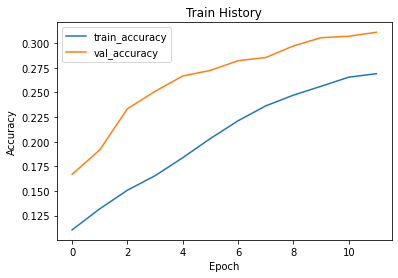

In [46]:
show_train_history('accuracy','val_accuracy')